In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pmdarima.arima import ndiffs
import pmdarima as pm
from statsmodels.tsa.arima.model import ARIMA

from plotly.offline import init_notebook_mode, iplot

init_notebook_mode(connected=True)
import plotly.graph_objs as go

import os
import warnings
warnings.filterwarnings("ignore")
plt.style.use('ggplot')

C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\compat\pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [2]:
pv_data = pd.read_csv("pv_20220215.csv")
pv_data

,area,time,familyID,state,pvVoltage,pvCurrent,pvPower,gridVoltage,gridCurrent,gridPower,...,gridCurrentC,gridPowerC,accurgenamount,totalaccurgenamount,powerFactor,powerHz,errorState,outsidetemp,moduletemp,cdate
0,sc_jong,2022-01-01 00:00:00,Group010,N,0.0,0.0,0,230.53,0.40,0,...,0.40,0,0,46034400,0.007,60.0,0,0,0,2022-01-01 00:00:00
1,sc_jong,2022-01-01 00:00:00,Group011,5120,0.0,0.0,0,0.00,0.00,0,...,0.00,0,121800,23327000,0.000,0.0,0,0,0,2022-01-01 00:00:00
2,sc_jong,2022-01-01 00:00:00,Group012,5120,0.0,0.0,0,0.00,0.00,0,...,0.00,0,89700,21520000,0.000,0.0,0,0,0,2022-01-01 00:00:00
3,sc_jong,2022-01-01 00:00:00,Group020,N,0.0,0.0,0,230.31,0.28,0,...,0.31,0,0,14966280,0.028,59.9,0,0,0,2022-01-01 00:00:00
4,sc_jong,2022-01-01 00:00:00,Group021,5120,0.0,0.0,0,0.00,0.00,0,...,0.00,0,74900,14539000,0.000,0.0,0,0,0,2022-01-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244652,sc_jong,2022-02-01 14:30:00,Group010,N,0.0,0.0,0,231.62,48.40,33760,...,48.40,0,0,52088400,0.998,60.0,0,0,0,2022-02-01 14:29:59
244653,sc_jong,2022-02-01 14:30:00,Group011,0,553.7,30.6,16839,230.40,24.30,16586,...,24.30,0,104400,26524000,0.999,59.9,0,0,0,2022-02-01 14:29:59
244654,sc_jong,2022-02-01 14:30:00,Group012,0,545.9,30.3,16517,231.20,23.70,16177,...,23.70,0,92200,24151000,0.999,59.9,0,0,0,2022-02-01 14:29:59
244655,sc_jong,2022-02-01 14:30:00,Group020,N,0.0,0.0,0,231.51,16.15,11231,...,16.12,0,0,16967750,0.998,60.0,0,0,0,2022-02-01 14:29:59


In [3]:
groups = pv_data.groupby(pv_data.familyID)
len(groups)

18

In [4]:
for i in range(0, len(groups.first().index[:])):
    globals()['pv_df_'+str(i)] = groups.get_group(groups.first().index[i])

In [5]:
pv_df_5

,area,time,familyID,state,pvVoltage,pvCurrent,pvPower,gridVoltage,gridCurrent,gridPower,...,gridCurrentC,gridPowerC,accurgenamount,totalaccurgenamount,powerFactor,powerHz,errorState,outsidetemp,moduletemp,cdate
2235,sc_jong,2022-01-01 07:31:05,21-1,N,187.0,0.0,0,0.0,0.0,0,...,0.0,0,0,15941184,0.0,0.0,0,0,0,2022-01-01 07:31:05
2241,sc_jong,2022-01-01 07:32:05,21-1,N,190.0,0.0,0,0.0,0.0,0,...,0.0,0,0,15941184,0.0,0.0,0,0,0,2022-01-01 07:32:05
2247,sc_jong,2022-01-01 07:33:05,21-1,N,192.0,0.0,0,0.0,0.0,0,...,0.0,0,0,15941184,0.0,0.0,0,0,0,2022-01-01 07:33:05
2255,sc_jong,2022-01-01 07:34:05,21-1,N,193.0,0.0,0,0.0,0.0,0,...,0.0,0,0,15941184,0.0,0.0,0,0,0,2022-01-01 07:34:05
2274,sc_jong,2022-01-01 07:36:05,21-1,N,196.0,0.0,0,0.0,0.0,0,...,0.0,0,0,15941184,0.0,0.0,0,0,0,2022-01-01 07:36:05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244612,sc_jong,2022-02-01 14:26:16,21-1,N,191.0,8.0,1560,0.0,0.0,0,...,0.0,0,0,16299344,0.0,0.0,0,0,0,2022-02-01 14:29:20
244615,sc_jong,2022-02-01 14:26:19,21-1,N,188.0,8.0,1560,0.0,0.0,0,...,0.0,0,0,16299344,0.0,0.0,0,0,0,2022-02-01 14:29:20
244625,sc_jong,2022-02-01 14:27:16,21-1,N,190.0,8.0,1597,0.0,0.0,0,...,0.0,0,0,16299369,0.0,0.0,0,0,0,2022-02-01 14:29:20
244638,sc_jong,2022-02-01 14:28:16,21-1,N,189.0,8.0,1545,0.0,0.0,0,...,0.0,0,0,16299395,0.0,0.0,0,0,0,2022-02-01 14:31:12


In [6]:
timeSeries = pv_df_5.loc[:,["time","pvPower"]]
timeSeries.index = pd.to_datetime(timeSeries.time)
ts = timeSeries.drop("time", axis=1)

In [7]:
df_summary = pd.DataFrame()
df_summary['pvPower'] = ts.pvPower.resample('1H').sum()
df_summary

,pvPower
time,
2022-01-01 07:00:00,1891
2022-01-01 08:00:00,58969
2022-01-01 09:00:00,106008
2022-01-01 10:00:00,104761
2022-01-01 11:00:00,121112
...,...
2022-02-01 10:00:00,143033
2022-02-01 11:00:00,150128
2022-02-01 12:00:00,150488


<AxesSubplot:xlabel='time'>

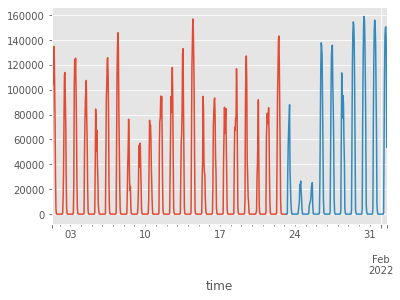

In [8]:
y_train = df_summary['pvPower'][:int(0.7*len(df_summary))+1]
y_test = df_summary['pvPower'][int(0.7*len(df_summary)):]
y_train.plot()
y_test.plot()

In [9]:
#최선 차분 수 파악
kpss_diffs = ndiffs(y_train, alpha=0.05, test='kpss', max_d=6)
adf_diffs = ndiffs(y_train, alpha=0.05, test='adf', max_d=6)
n_diffs = max(adf_diffs, kpss_diffs)

print(f"추정된 차수 d = {n_diffs}")

추정된 차수 d = 0


In [10]:
model = pm.auto_arima(y = y_train, max_d=2,start_p=0,
                     max_p = 3,
                     start_q = 0,
                     max_q = 3,
                     seasonal = True,
                     stepwise = True,
                     trace = True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=12635.914, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=11800.876, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=12228.964, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=12798.313, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=11547.546, Time=0.05 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=11548.379, Time=0.11 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=11547.588, Time=0.12 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=11619.972, Time=0.06 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=11549.490, Time=0.43 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=11577.168, Time=0.04 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 1.019 seconds


In [11]:
model.fit(y_train)

ARIMA(order=(2, 0, 0), scoring_args={}, suppress_warnings=True)

In [12]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  527
Model:               SARIMAX(2, 0, 0)   Log Likelihood               -5769.773
Date:                Thu, 17 Feb 2022   AIC                          11547.546
Time:                        10:23:34   BIC                          11564.615
Sample:                             0   HQIC                         11554.229
                                - 527                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3948.7238    881.650      4.479      0.000    2220.721    5676.727
ar.L1          1.4505      0.029     49.623      0.000       1.393       1.508
ar.L2         -0.6242      0.028    -22.566      0.0

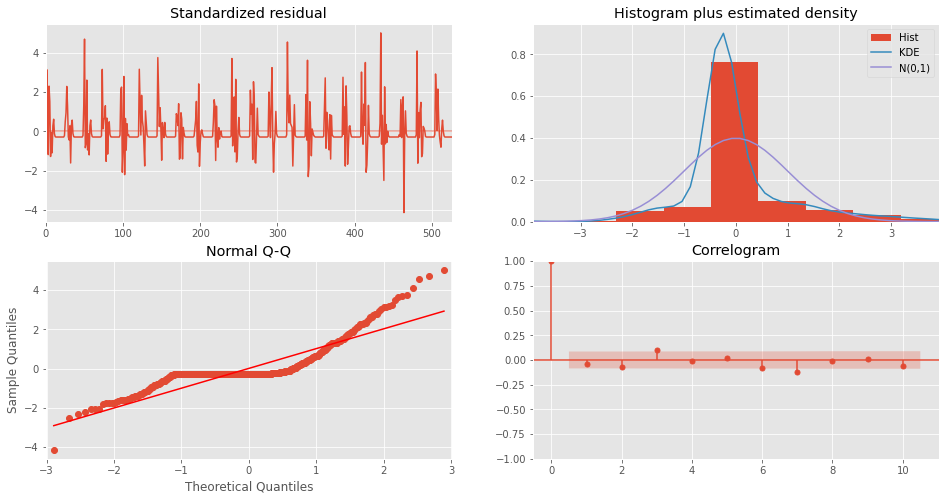

In [13]:
model.plot_diagnostics(figsize=(16,8))
plt.show()

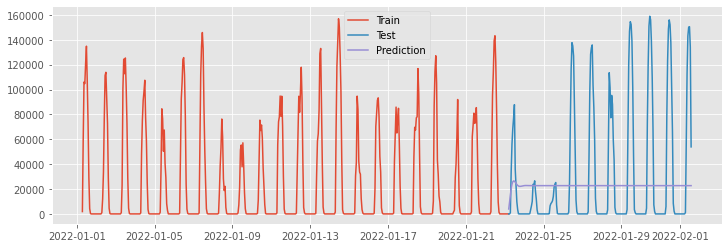

In [14]:
#테스트 데이터 개수만큼 예측
y_predict = model.predict(n_periods=len(y_test))
y_predict = pd.DataFrame(y_predict,index = y_test.index,columns=['Prediction'])

#그래프
fig, axes = plt.subplots(1,1,figsize= (12,4))
plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test')
plt.plot(y_predict, label='Prediction')
plt.legend()
plt.show()

In [15]:
def forecast_one_step():
    fc, conf_int = model.predict(n_periods=1 # 한 스텝씩!
        , return_conf_int=True)              # 신뢰구간 출력
    return (
        fc.tolist()[0],
        np.asarray(conf_int).tolist()[0]
    )

In [16]:
forecasts = []
y_pred = []
pred_upper = []
pred_lower = []

for new_ob in y_test:
    fc, conf = forecast_one_step()
    y_pred.append(fc)
    pred_upper.append(conf[1])
    pred_lower.append(conf[0])
    
    #Update Model
    model.update(new_ob)

In [17]:
pd.DataFrame({"test" : y_test, "pred": y_pred})

,test,pred
time,,
2022-01-23 05:00:00,0,3948.723839
2022-01-23 06:00:00,0,3948.723839
2022-01-23 07:00:00,934,3948.723839
2022-01-23 08:00:00,33872,5303.510629
2022-01-23 09:00:00,56081,52506.409394
...,...,...
2022-02-01 10:00:00,143033,134120.415531
2022-02-01 11:00:00,150128,144063.589865
2022-02-01 12:00:00,150488,134542.564042


In [18]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  753
Model:               SARIMAX(2, 0, 0)   Log Likelihood               -8248.704
Date:                Thu, 17 Feb 2022   AIC                          16505.409
Time:                        10:23:44   BIC                          16523.905
Sample:                             0   HQIC                         16512.534
                                - 753                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3948.7236    700.710      5.635      0.000    2575.357    5322.090
ar.L1          1.4995      0.022     68.261      0.000       1.456       1.543
ar.L2         -0.6633      0.021    -31.989      0.0

In [19]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = go.Figure([
    # 훈련 데이터-------------------------------------------------------
    go.Scatter(x = y_train.index, y = y_train, name = "Train", mode = 'lines'
              ,line=dict(color = 'royalblue'))
    # 테스트 데이터------------------------------------------------------
    , go.Scatter(x = y_test.index, y = y_test, name = "Test", mode = 'lines'
                ,line = dict(color = 'rgba(0,0,30,0.5)'))
    # 예측값-----------------------------------------------------------
    , go.Scatter(x = y_test.index, y = y_pred, name = "Prediction", mode = 'lines'
                     ,line = dict(color = 'red', dash = 'dot', width=3))
    
    # 신뢰 구간---------------------------------------------------------
    , go.Scatter(x = y_test.index.tolist() + y_test.index[::-1].tolist() 
                ,y = pred_upper + pred_lower[::-1] ## 상위 신뢰 구간 -> 하위 신뢰 구간 역순으로
                ,fill='toself'
                ,fillcolor='rgba(0,0,30,0.1)'
                ,line=dict(color='rgba(0,0,0,0)')
                ,hoverinfo="skip"
                ,showlegend=False)
])

fig.update_layout(height=400, width=1000, title_text="ARIMA(2,0,0)모형")
fig.show()

In [20]:
from sklearn import metrics

def scoring(y_true, y_pred):
    r2 = round(metrics.r2_score(y_true, y_pred) * 100, 3)
    mae = round(metrics.mean_absolute_error(y_true, y_pred), 3)
    corr = round(np.corrcoef(y_true, y_pred)[0,1],3)
    mape = round(metrics.mean_absolute_percentage_error(y_true, y_pred) * 100, 3)
    rmse = round(metrics.mean_squared_error(y_true, y_pred, squared=False), 3)
    rrmse = rmse / np.mean(y_true)
    
    df = pd.DataFrame({
        'R2': r2,
        'MAE' : mae,
        'Corr' : corr,
        'RMSE' : rmse,
        'RRMSE' : rrmse
        #'MAPE' : mape
    }, index=[0])
    return df

In [21]:
scoring(y_test, y_pred)

,R2,MAE,Corr,RMSE,RRMSE
0,91.656,8586.172,0.958,14074.933,0.483873
